In [1]:
import zarr
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from global_land_mask import globe
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
import scipy

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython.display import Image
from matplotlib.colors import ListedColormap

mpl.rcParams['figure.dpi']= 300
plt.rcParams.update({'font.size': 8})
mpl.rcParams['axes.linewidth'] = 0.3
g = 9.80616 #Avg. gravity acceleration on Earth

# New custom colormap
cmap = ListedColormap([
    "#ffffff", "#ffffb2", "#fecc5c", "#fd8d3c", "#f03b20", "#bd0026"
])

In [2]:
pik = xr.open_dataset('/Users/rm65238/Documents/PIKART/PIKARTV1_lagrangian_ERA5_0p5deg_6hr_2023.nc')

In [ ]:
'2023-11-25T15:00:00.000000000'

In [5]:
# Gulf
lat1, lat2 = 45, 10
lon1, lon2 = 250, 300

In [25]:
pik_sel = pik.sel(time = '2023-11-25T15:00:00.000000000', latitude=slice(lat2,lat1), longitude=slice(lon1-360,lon2-360))

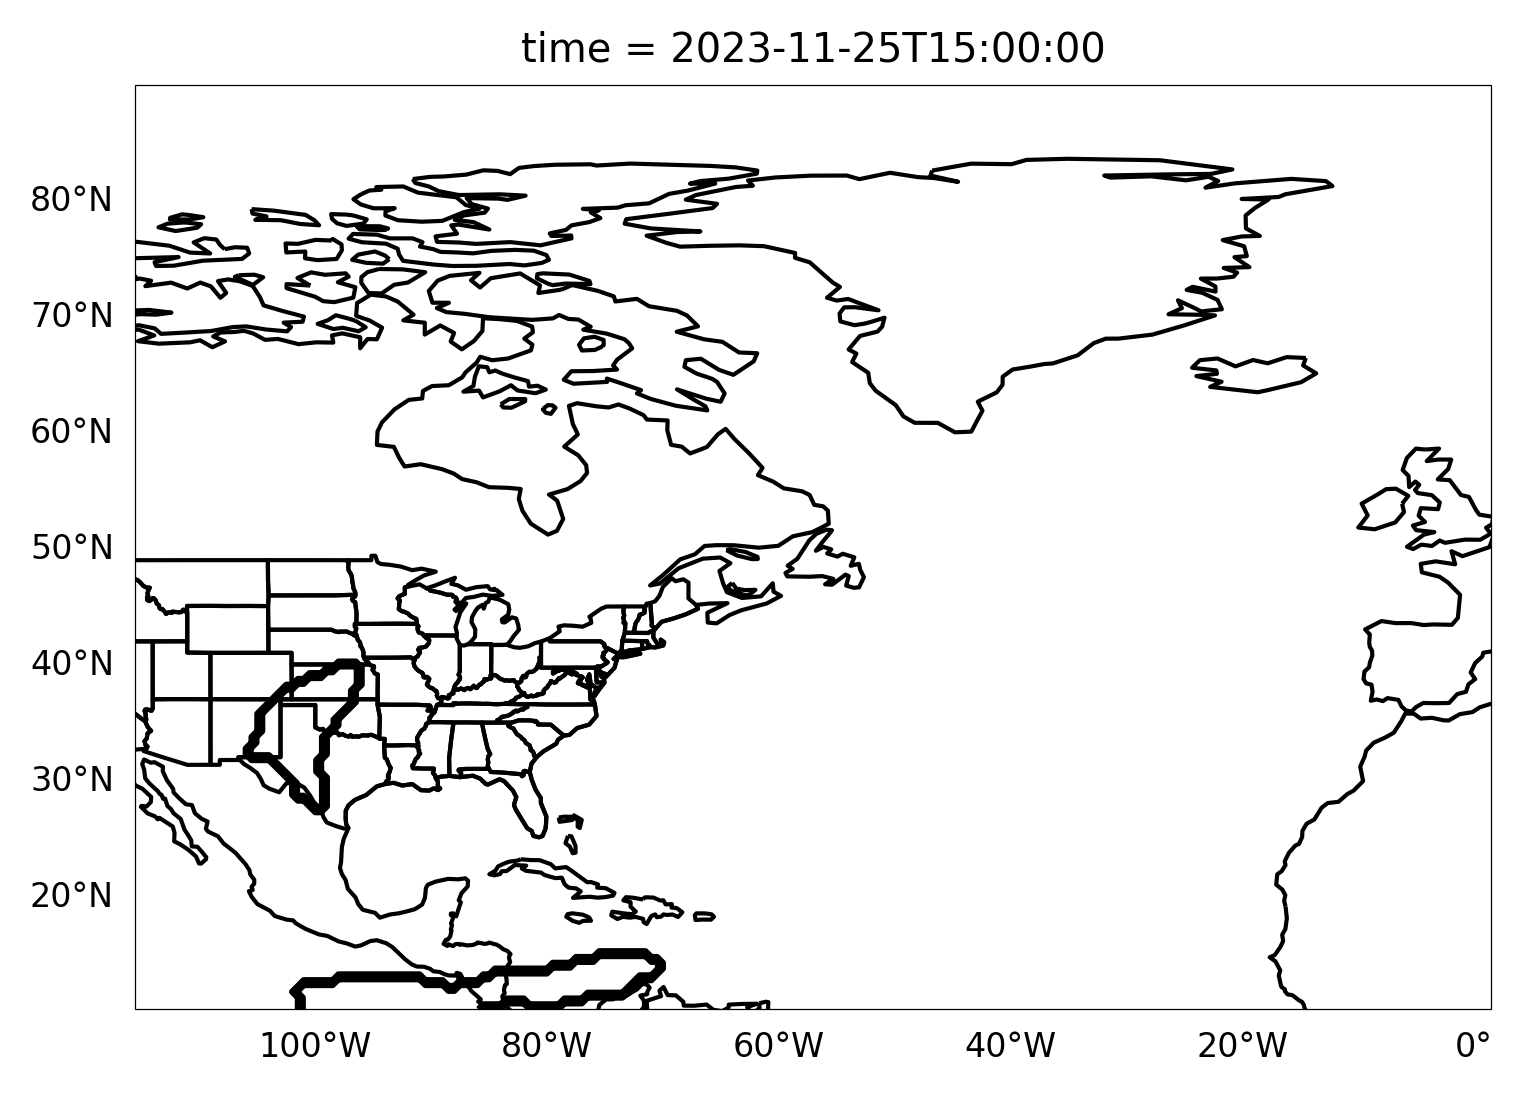

In [32]:
# Setup plot
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', zorder=10)

gls = ax.gridlines(draw_labels=True, color='none')
gls.top_labels = False
gls.right_labels = False

current_plot = [pik_sel.footprints.plot.contour(cmap='black',
    transform=ccrs.PlateCarree(), add_colorbar=False, vmin=200)]

current_plot = pik_sel.centroid.plot(cmap='viridis',
    transform=ccrs.PlateCarree(), add_colorbar=False)

<xarray.DataArray 'length' (time: 1428, trackid: 1663)> Size: 9MB
[2374764 values with dtype=float32]
Coordinates:
  * trackid  (trackid) uint32 7kB 132977 132983 132995 ... 134659 134660 134661
  * time     (time) datetime64[ns] 11kB 2023-01-01T03:00:00 ... 2023-12-23T21...
Attributes:
    standard_name:  atmospheric_river_length
    long_name:      Length of the atmospheric river axis
    units:          km

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       ...,
       [nan, nan],
       [nan, nan],
       [nan, nan]], dtype=float32)

In [33]:
new = pik.sel(time = '2023-11-25T15:00:00.000000000')

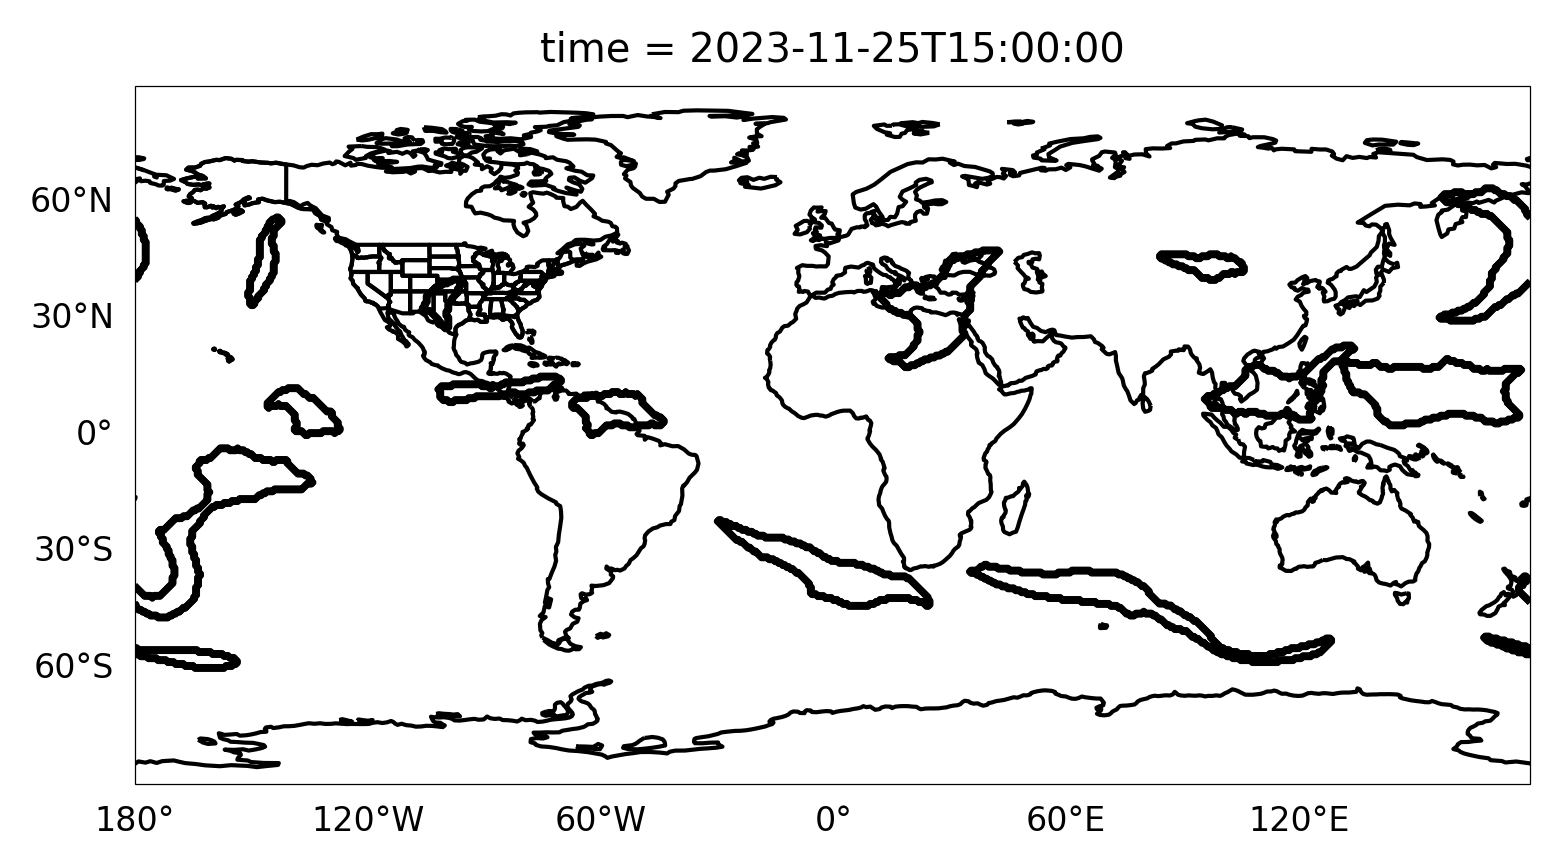

In [38]:
# Setup plot
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', zorder=10)

gls = ax.gridlines(draw_labels=True, color='none')
gls.top_labels = False
gls.right_labels = False

current_plot = [new.footprints.plot.contour(cmap='black',
    transform=ccrs.PlateCarree(), add_colorbar=False, vmin=200)]

current_plot = new.centroid.plot(cmap='viridis',
    transform=ccrs.PlateCarree(), add_colorbar=False)

In [40]:
pik.sel(trackid=132977)

<xarray.Dataset> Size: 2GB
Dimensions:        (time: 1428, longitude: 720, latitude: 360, coordinate: 2,
                    max_contour_size: 1815, max_axis_size: 671, component: 3)
Coordinates:
    trackid        uint32 4B 132977
  * time           (time) datetime64[ns] 11kB 2023-01-01T03:00:00 ... 2023-12...
  * longitude      (longitude) float32 3kB -180.0 -179.5 -179.0 ... 179.0 179.5
  * latitude       (latitude) float32 1kB -89.75 -89.25 -88.75 ... 89.25 89.75
Dimensions without coordinates: coordinate, max_contour_size, max_axis_size,
                                component
Data variables: (12/69)
    footprints     (time, latitude, longitude) uint32 1GB ...
    contour        (time, coordinate, max_contour_size) float32 21MB ...
    axis           (time, coordinate, max_axis_size) float32 8MB ...
    centroid       (time, coordinate) float32 11kB ...
    head           (time, coordinate) float32 11kB ...
    tail           (time, coordinate) float32 11kB ...
    ...             ...
    is_relaxed     (time) int8 1kB ...
    why_relaxed    (time) |S24 34kB ...
    land_inters    int8 1B ...
    land_falling   int8 1B ...
    lf_loc         (time, coordinate) float32 11kB ...
    inland_pen     int8 1B ...
Attributes:
    conventions:  CF-1.12
    title:        PIK Atmospheric River Trajectories (PIKART) Lagrangian Cata...
    version:      1.0
    source:       Atmospheric river detection tool applied to ERA5 reanalysis...
    institution:  Potsdam Institute for Climate Impact Research (PIK) and Lei...
    references:   Vallejo-Bernal, S. M., Braun, T., Marwan, N., & Kurths, J. ...
    comment:      This dataset contains atmospheric river tracks with geometr...
    history:      Created on June 22, 2025